In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir(os.path.expanduser("~/work/m-labs/phaser"))

In [25]:
o = np.load("dds_6.npz")["o"]

In [232]:
t = 2*np.pi*np.arange(o.size)/1600
o = .45*np.cos((157+5)*t) + .4*np.cos((157+81)*t)

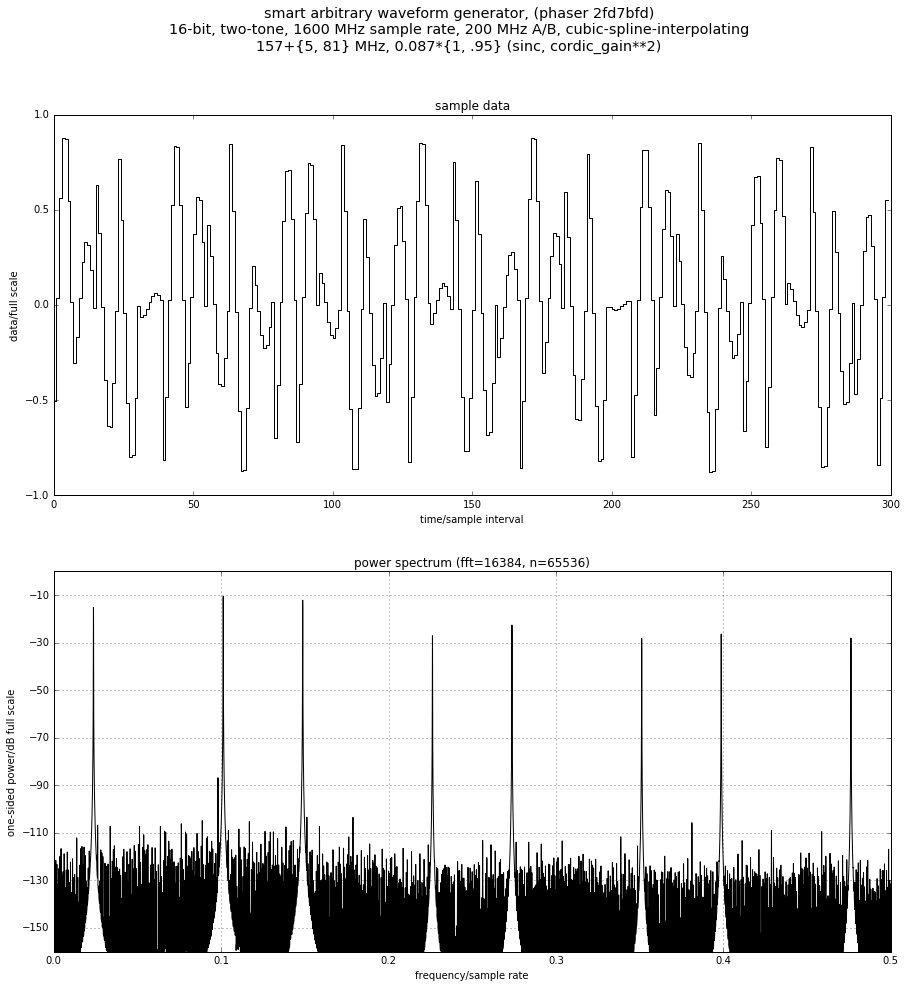

In [26]:
fig, ax = plt.subplots(2, figsize=(15, 15))
fig.text(.5, 1, "smart arbitrary waveform generator, (phaser 2fd7bfd)\n"
              "16-bit, two-tone, 1600 MHz sample rate, 200 MHz A/B, cubic-spline-interpolating\n"
             "157+{5, 81} MHz, 0.087*{1, .95} (sinc, cordic_gain**2)",
             ha="center", va="top", size="x-large")
t = np.arange(min(300, o.size))
ax[0].step(t, o[:len(t)], "k")
ax[0].set_title("sample data")
ax[0].set_xlabel("time/sample interval")
ax[0].set_ylabel("data/full scale")
n = max(o.size // 4, 1024)
p, f = ax[1].psd(o, NFFT=n, Fs=1, noverlap=int(n/1.5), scale_by_freq=False, color="k")
ax[1].set_title("power spectrum (fft={}, n={})".format(n, o.size))
ax[1].set_xlabel("frequency/sample rate")
ax[1].set_ylabel("one-sided power/dB full scale")
ax[1].set_ylim(-160, 0)
fig.savefig("phaser_2fd7bfd.pdf")

In [5]:
#p[np.argsort(p)[-80:]]=0
np.log10(1-p[np.argsort(p)[-70:]].sum()/p.sum())

-6.0037788149206541

-79.82181715474384

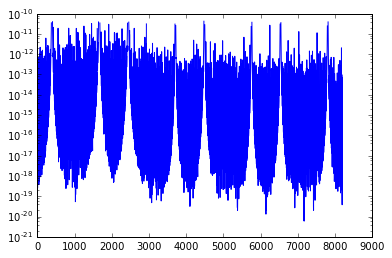

In [20]:
q = p.copy()
q[np.argsort(p)[-200:]]=0
plt.semilogy(q)
np.log10(q.sum()/p.sum())*10

In [8]:
p.sum()

0.29419339257575999